In [1]:
from pylab import *

In [2]:
x=rand(100)
X=fft(x)
y=ifft(X)
c_[x,y]
print ("Absolute Maximum Error = ",abs(x-y).max())

Absolute Maximum Error =  4.46552732754851e-16


### Example-1

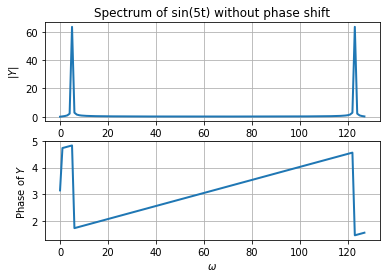

In [3]:
x=linspace(0,2*pi,128)
y=sin(5*x)
Y=fft(y)

# Plotting
figure()
subplot(2,1,1)
title("Spectrum of sin(5t) without phase shift")
plot(abs(Y),lw=2)
grid(True)
ylabel(r"$|Y|$")

subplot(2,1,2)
plot(unwrap(angle(Y)),lw=2)
ylabel(r"Phase of $Y$")
xlabel(r"$\omega$")
grid(True)
show()

In [4]:
def dft(x_start,x_end,steps,f,xlim1,titl,ylabel1,ylabel2,xlabel1,savename,go=False):
    #finding FFT
    sampling_rate = steps/(x_end-x_start)
    x=linspace(x_start,x_end,steps+1)[:-1]
    y = f(x)
    Y=fftshift(fft(y))/float(steps)
    w=sampling_rate*(linspace(-pi,pi,steps+1)[:-1])
    
    #plotting
    figure()
    subplot(2,1,1)
    plot(w,abs(Y),lw=2)
    xlim([-xlim1,xlim1])
    ylabel(ylabel1,size=16)
    title(titl)
    grid(True)
    subplot(2,1,2)
    ro = False
    
    if (ro):
        plot(w,angle(Y),'ro',lw=2)
    if(go):
        ii=where(abs(Y)>1e-3)
        plot(w[ii],angle(Y[ii]),'go',lw=2)

    xlim([-xlim1,xlim1])
    ylabel(ylabel2,size=16)
    xlabel(xlabel1,size=16)
    grid(True)
    savefig(savename)
    show()
    return

### Example-2

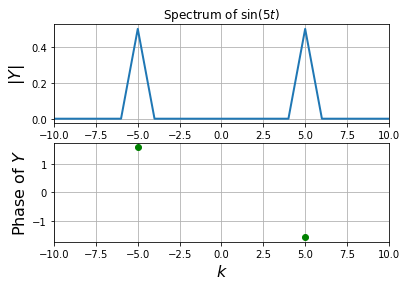

In [5]:
def f3(x):
    return sin(5*x)

dft(0,2*pi,128,f3,10,r"Spectrum of $\sin(5t)$",r"$|Y|$",r"Phase of $Y$",r"$k$","fig9-2.png",go = True)

### Example-3

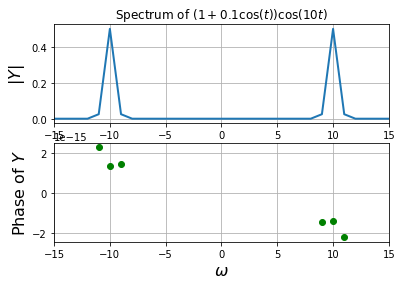

In [6]:
def f4(t):
    return (1+0.1*cos(t))*cos(10*t)

dft(0,2*pi,128,f4,15,r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$",r"$|Y|$",r"Phase of $Y$",r"$\omega$","fig9-3.png",go =True)

### Example-4

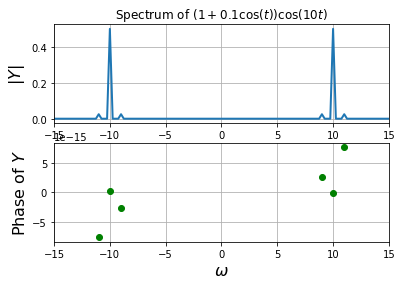

In [7]:
dft(-4*pi,4*pi,512,f4,15,r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$",r"$|Y|$",r"Phase of $Y$",r"$\omega$","fig9-4.png",go =True)

## 2. Spectrum of $sin^{3}t$ and $cos^{3}t$

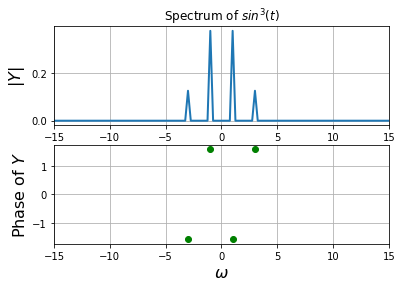

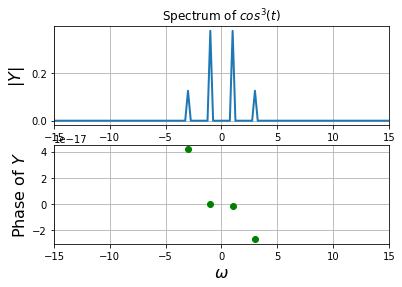

In [8]:
def f6(x):
    return (sin(x))**3

def f7(x):
    return (cos(x))**3

dft(-4*pi,4*pi,512,f6,15,r"Spectrum of $sin^3(t)$",r"$|Y|$",r"Phase of $Y$",r"$\omega$","fig9-5.png",go =True)
dft(-4*pi,4*pi,512,f7,15,r"Spectrum of $cos^3(t)$",r"$|Y|$",r"Phase of $Y$",r"$\omega$","fig9-6.png",go =True)

## 3. Spectrum of cos(20t + 5cos(t))

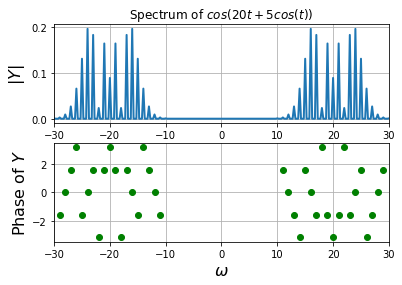

In [9]:
def f8(x):
    return cos(20*x + 5*cos(x))

dft(-4*pi,4*pi,512,f8,30,r"Spectrum of $cos(20t + 5cos(t))$",r"$|Y|$",r"Phase of $Y$",r"$\omega$","fig9-7.png",go =True)

## 4. Gaussian

In [10]:
#defining gaussian and its expected CTFT 
def gauss(x):
    return exp(-0.5*x**2)

def expectedgauss(w):
    return 1/sqrt(2*pi) * exp(-w**2/2)

In [11]:
def estdft(tolerance=1e-6,samples=128,func = gauss,expectedfn = expectedgauss,wlim = 5):
    T = 8*pi
    N = samples
    Yold=0
    err=tolerance+1
    iters = 0
    #iterative loop to find window size
    while err>tolerance:  
        x=linspace(-T/2,T/2,N+1)[:-1]
        w = linspace(-N*pi/T,N*pi/T,N+1)[:-1]
        y = gauss(x)
        Y=fftshift(fft(ifftshift(y)))*T/(2*pi*N)
        err = sum(abs(Y[::2]-Yold))
        Yold = Y
        iters+=1
        T*=2
        N*=2
        
    #calculating error
    true_error = sum(abs(Y-expectedfn(w)))
    print("True error: ",true_error)
    print("samples = "+str(N)+" time period = pi*"+str(T/pi))

    mag = abs(Y)
    phi = angle(Y)
    phi[where(mag<tolerance)]=0
    
    # plot estimate
    figure()
    subplot(2,1,1)
    plot(w,abs(Y),lw=2)
    xlim([-wlim,wlim])
    ylabel('Magnitude',size=16)
    title("Estimate fft of gaussian")
    grid(True)
    subplot(2,1,2)
    plot(w,angle(Y),'ro',lw=2)
    ii=where(abs(Y)>1e-3)
    plot(w[ii],angle(Y[ii]),'go',lw=2)
    xlim([-wlim,wlim])
    ylabel("Phase",size=16)
    xlabel("w",size=16)
    grid(True)
    show()

    #plotting expected output    
    Y_ = expectedfn(w)
    mag = abs(Y_)
    phi = angle(Y_)
    phi[where(mag<tolerance)]=0
    
    figure()
    subplot(2,1,1)
    plot(w,abs(Y),lw=2)
    xlim([-wlim,wlim])
    ylabel('Magnitude',size=16)
    title("True fft of gaussian")
    grid(True)
    subplot(2,1,2)
    plot(w,angle(Y),'ro',lw=2)
    ii=where(abs(Y)>1e-3)
    plot(w[ii],angle(Y[ii]),'go',lw=2)
    xlim([-wlim,wlim])
    ylabel("Phase",size=16)
    xlabel("w",size=16)
    grid(True)
    show()

    return

True error:  1.4532298948786486e-14
samples = 512 time period = pi*32.0


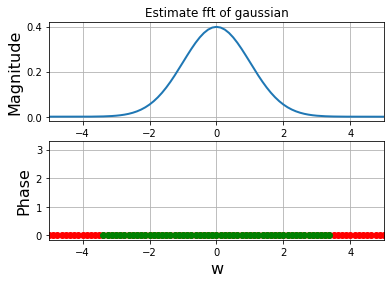

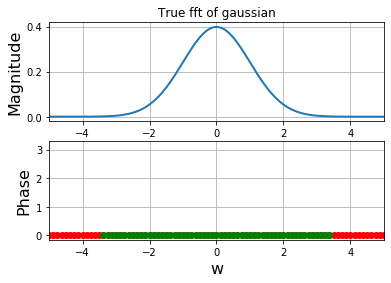

In [12]:
estdft()